<a href="https://colab.research.google.com/github/Ash100/Supplementary_data_of_PARP1_Inhibitors/blob/main/Tanimoto_Similarity_index_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit pandas tqdm requests --quiet



In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

compounds = {
    "pyrazolo pyrimidine": "COC(=O)N1CCC(CC1)N2C3=C(C=N2)C(=NC(=N3)C4=CC=C(C=C4)NC(=O)NC5=CN=CC=C5)N6CCOCC6",  # pyrazolo pyrimidine
    "Zavegepant": "CC1=CC(=CC2=C1NN=C2)C[C@H](C(=O)N3CCN(CC3)C4CCN(CC4)C)NC(=O)N5CCC(CC5)C6=CC7=CC=CC=C7NC6=O",  # Zavegepant
    "CHEMBL3306520": "C[N+]1=CC=CC(=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC(=C(C=C3)C(=O)NC4=CC=C(C=C4)C(=O)NC5=C[N+](=CC=C5)C)N ",  # CHEMBL3306520
    "methylbenzamido-nicotinic acid": "CC1=C(C=CC(=C1)Br)C(=O)NC2=CN=CC(=C2)C(=O)O",  # methylbenzamido-nicotinic acid
}

df_query = pd.DataFrame(list(compounds.items()), columns=["Name", "SMILES"])

def get_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

df_query["Fingerprint"] = df_query["SMILES"].apply(get_fingerprint)
print("Loaded query compounds:", len(df_query))
df_query


Loaded query compounds: 4


[15:31:38] DEPRECATION WARNING: please use MorganGenerator
[15:31:38] DEPRECATION WARNING: please use MorganGenerator
[15:31:38] DEPRECATION WARNING: please use MorganGenerator
[15:31:38] DEPRECATION WARNING: please use MorganGenerator


,Name,SMILES,Fingerprint
0,pyrazolo pyrimidine,COC(=O)N1CCC(CC1)N2C3=C(C=N2)C(=NC(=N3)C4=CC=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Zavegepant,CC1=CC(=CC2=C1NN=C2)C[C@H](C(=O)N3CCN(CC3)C4CC...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,CHEMBL3306520,C[N+]1=CC=CC(=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,methylbenzamido-nicotinic acid,CC1=C(C=CC(=C1)Br)C(=O)NC2=CN=CC(=C2)C(=O)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# 1️⃣ Load CSV
df_nat = pd.read_csv('/content/coconut_csv/coconut_csv-10-2025.csv')

# 2️⃣ Check column names
print(df_nat.columns)

# Make sure the SMILES column exists
smiles_column = "canonical_smiles"  # Replace if your CSV uses a different name
if smiles_column not in df_nat.columns:
    raise ValueError(f"SMILES column not found. Columns are: {df_nat.columns}")

# 3️⃣ Keep only valid SMILES
df_nat = df_nat[df_nat[smiles_column].notna()].copy()

# 4️⃣ Generate Morgan fingerprints safely
def get_fingerprint_safe(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        else:
            return None
    except:
        return None

df_nat["Fingerprint"] = df_nat[smiles_column].apply(get_fingerprint_safe)

# Drop rows where fingerprint could not be generated
df_nat = df_nat[df_nat["Fingerprint"].notna()].copy()
print("Natural products with fingerprints:", len(df_nat))
df_nat.head()


In [ ]:
from rdkit.Chem import DataStructs
from tqdm import tqdm

results = []

for _, qrow in tqdm(df_query.iterrows(), total=len(df_query)):
    for _, nrow in df_nat.iterrows():
        sim = DataStructs.TanimotoSimilarity(qrow['Fingerprint'], nrow['Fingerprint'])
        results.append([qrow['Name'], nrow['identifier'], nrow['canonical_smiles'], sim])

df_sim = pd.DataFrame(results, columns=["Query", "Natural_ID", "Natural_SMILES", "Similarity"])
df_sim.head()


100%|██████████| 4/4 [03:18<00:00, 49.53s/it]


,Query,Natural_ID,Natural_SMILES,Similarity
0,pyrazolo pyrimidine,CNP0349270.1,CCOC(=O)OC1=C(OC)C=C(C(=O)O[C@@H]2C[C@@H]3CN4C...,0.127820
1,pyrazolo pyrimidine,CNP0112755.1,C[C@]12CC[C@H]3[C@@H](CC=C4CC5(CC[C@@]43CCN)OC...,0.084112
2,pyrazolo pyrimidine,CNP0342201.1,CO[C@@]12[C@H](COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=...,0.102804
3,pyrazolo pyrimidine,CNP0074418.1,CC(=O)OC[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@@H](N...,0.089286
4,pyrazolo pyrimidine,CNP0265730.0,CCCN1C(=O)NC(=O)C2=C1N=CN2,0.075269


In [ ]:
# Rank Top 5 natural analogs per synthetic compound
top_hits = (
    df_sim.sort_values(by=["Query", "Similarity"], ascending=[True, False])
    .groupby("Query")
    .head(5)
)

# Export CSV
top_hits.to_csv("Top_Natural_Analogs.csv", index=False)
top_hits


,Query,Natural_ID,Natural_SMILES,Similarity
1528155,CHEMBL3306520,CNP0397780.0,NC1=CC=C(C(=O)NC2=CC=C(C(=O)O)C(N)=C2)C=C1,0.460000
1468222,CHEMBL3306520,CNP0604541.0,C[N+]1=CC=C(NC(=O)C2=CC=CC=C2)C=C1,0.446809
1519586,CHEMBL3306520,CNP0398940.0,NC1=CC=CC(C(=O)NC2=CC=CC=C2)=C1,0.408163
1908331,CHEMBL3306520,CNP0317150.0,CC1=CC=C(C(=O)NC2=CC=CC=C2)C=C1,0.404255
1768895,CHEMBL3306520,CNP0569328.0,CC(=O)NC1=CC=C(C(=O)NC2=CC=CC=C2N)C=C1,0.403846
1277664,Zavegepant,CNP0599203.1,CN1CCC(N2CCN(C(=O)[C@H](NC(=O)C3=CC=C4C=CNC4=C...,0.357143
922746,Zavegepant,CNP0565948.1,NCCCC[C@H](NC(=O)[C@@H](CC1=CC(Br)=C(O)C(Br)=C...,0.316667
1159669,Zavegepant,CNP0186714.1,CN1CCC(N2CC[C@H](C3=NC4=CC=CC=C4N3)C2)CC1,0.314607
1365811,Zavegepant,CNP0217470.1,O=C(O)C1CCN(C(=O)[C@H](CC2=CC=CC=C2)NC(=O)[C@H...,0.313725
746144,Zavegepant,CNP0503957.1,CN1CCC(N2CC[C@H](C3=NC4=C(C(N)=O)C=CC=C4N3)C2)CC1,0.312500


In [ ]:
from rdkit.Chem import Draw

def visualize_hits(query_name):
    # Filter top hits for the query
    sub = top_hits[top_hits["Query"] == query_name]

    if sub.empty:
        print(f"No hits found for {query_name}")
        return None

    # Convert SMILES to molecules and filter out invalid ones
    mols = []
    legends = []
    for smi, id, sim in zip(sub["Natural_SMILES"], sub["Natural_ID"], sub["Similarity"]):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            mols.append(mol)
            legends.append(f"{id}\nSim={sim:.2f}")

    if not mols:
        print(f"No valid molecules to draw for {query_name}")
        return None

    # Draw molecules grid
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=3,
        legends=legends,
        subImgSize=(250, 250)
    )
    return img

# Example usage
img = visualize_hits("pyrazolo pyrimidine")
if img:
    display(img)


In [ ]:
from rdkit.Chem import Draw

# Collect all top 20 molecules
all_mols = []
all_legends = []

for query_name in df_query["Name"]:
    sub = top_hits[top_hits["Query"] == query_name]
    for smi, id, sim in zip(sub["Natural_SMILES"], sub["Natural_ID"], sub["Similarity"]):
        mol = Chem.MolFromSmiles(smi)
        if mol:  # skip invalid SMILES
            all_mols.append(mol)
            all_legends.append(f"{query_name}\n{id}\nSim={sim:.2f}")

print("Total molecules to draw:", len(all_mols))


Total molecules to draw: 20


In [ ]:
from rdkit.Chem import Draw
from PIL import Image
import io

# Collect molecules and legends
all_mols = []
all_legends = []

for query_name in df_query["Name"]:
    sub = top_hits[top_hits["Query"] == query_name]
    for smi, id, sim in zip(sub["Natural_SMILES"], sub["Natural_ID"], sub["Similarity"]):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            all_mols.append(mol)
            all_legends.append(f"{query_name}\n{id}\nSim={sim:.2f}")

# Draw molecules to PNG bytes
img_bytes = Draw.MolsToGridImage(
    all_mols,
    molsPerRow=5,
    legends=all_legends,
    subImgSize=(300, 300),
    useSVG=False,
    returnPNG=True  # crucial: returns bytes
)

# Convert bytes to PIL Image
img = Image.open(io.BytesIO(img_bytes))

# Save high-resolution publication PNG
# Save high-resolution publication PNG
img.save("Top20_Natural_Analogs.png", dpi=(600,600))

# Instead of img.show(), just put the image object at the end of the cell
img



TypeError: a bytes-like object is required, not 'Image'

In [ ]:
# Robust saver for RDKit MolsToGridImage outputs (handles bytes / PIL / IPython / ndarray / SVG)
from rdkit.Chem import Draw
from rdkit import Chem
from PIL import Image
import io
import numpy as np
import os
import traceback

# ---- Configuration: adjust as needed ----
OUTNAME = "Top20_Natural_Analogs.png"
SUBIMG = (300, 300)   # per-molecule image size (increase for higher resolution)
MOLS_PER_ROW = 5      # 5 x 4 = 20
DPI = (600, 600)      # desired saved dpi
# -----------------------------------------

# === 0. Sanity checks ===
if 'top_hits' not in globals():
    raise RuntimeError("top_hits DataFrame not found in the notebook. Run similarity steps first to create `top_hits`.")

if 'df_query' not in globals():
    raise RuntimeError("df_query DataFrame not found. Ensure your query compounds DataFrame `df_query` exists.")

# === 1. Collect molecules and legends (max 20) ===
all_mols = []
all_legends = []
for query_name in df_query["Name"]:
    sub = top_hits[top_hits["Query"] == query_name]
    # take top up to 5 for each = 5 * number of queries
    for smi, id_, sim in zip(sub["Natural_SMILES"], sub["Natural_ID"], sub["Similarity"]):
        try:
            mol = Chem.MolFromSmiles(smi)
            if mol:
                all_mols.append(mol)
                all_legends.append(f"{query_name}\n{id_}\nSim={sim:.2f}")
        except Exception:
            continue
# Trim to 20 if more for safety
if len(all_mols) > 20:
    all_mols = all_mols[:20]
    all_legends = all_legends[:20]

if len(all_mols) == 0:
    raise RuntimeError("No valid molecules found to draw. Check SMILES validity in top_hits.")

print(f"Preparing to draw {len(all_mols)} molecules...")

# === 2. Try multiple drawing & saving strategies until one works ===
last_error = None

def try_save_from_png_bytes(png_bytes, outname=OUTNAME, dpi=DPI):
    """Open PNG bytes with PIL and save with dpi"""
    im = Image.open(io.BytesIO(png_bytes))
    # convert to RGBA or RGB to ensure compatibility
    if im.mode not in ("RGB", "RGBA"):
        im = im.convert("RGBA")
    im.save(outname, dpi=dpi)
    print(f"Saved image as: {outname} (from PNG bytes)")

def try_save_from_pil_image(pil_img, outname=OUTNAME, dpi=DPI):
    """Save a PIL.Image directly"""
    if pil_img.mode not in ("RGB", "RGBA"):
        pil_img = pil_img.convert("RGBA")
    pil_img.save(outname, dpi=dpi)
    print(f"Saved image as: {outname} (from PIL.Image)")

def try_save_from_array(arr, outname=OUTNAME, dpi=DPI):
    """Save numpy array image"""
    if arr.dtype != np.uint8:
        arr = (255 * (arr - arr.min())/(arr.max()-arr.min()+1e-12)).astype(np.uint8)
    im = Image.fromarray(arr)
    if im.mode not in ("RGB", "RGBA"):
        im = im.convert("RGBA")
    im.save(outname, dpi=dpi)
    print(f"Saved image as: {outname} (from ndarray)")

def try_save_svg(svg_text, outname_svg="Top20_Natural_Analogs.svg"):
    """Save SVG text (fallback)"""
    with open(outname_svg, "w", encoding="utf-8") as f:
        f.write(svg_text)
    print(f"Saved SVG as: {outname_svg}. You can convert it to PNG with external tools if needed.")

# Attempt 1: Request PNG bytes (most reliable with current RDKit builds)
try:
    png_bytes = Draw.MolsToGridImage(
        all_mols,
        molsPerRow=MOLS_PER_ROW,
        legends=all_legends,
        subImgSize=SUBIMG,
        useSVG=False,
        returnPNG=True
    )
    # png_bytes might be bytes already or an IPython Image (in which case we handle below)
    if isinstance(png_bytes, (bytes, bytearray)):
        try_save_from_png_bytes(png_bytes)
        raise SystemExit  # success -> stop further attempts
    # if it's an object with `.data` or `.png` attribute, try to extract bytes
    if hasattr(png_bytes, "data"):
        try_save_from_png_bytes(png_bytes.data)
        raise SystemExit
    if hasattr(png_bytes, "png"):
        try_save_from_png_bytes(png_bytes.png)
        raise SystemExit
    # if it's PIL.Image
    if isinstance(png_bytes, Image.Image):
        try_save_from_pil_image(png_bytes)
        raise SystemExit
    # if it's numpy array
    if isinstance(png_bytes, np.ndarray):
        try_save_from_array(png_bytes)
        raise SystemExit
    # otherwise, fall through to next approach
except SystemExit:
    pass
except Exception as e:
    last_error = e
    print("Attempt 1 (returnPNG=True) failed:", repr(e))
    traceback.print_exc()

# Attempt 2: Request PIL image directly (returnPNG=False) and inspect
try:
    img_obj = Draw.MolsToGridImage(
        all_mols,
        molsPerRow=MOLS_PER_ROW,
        legends=all_legends,
        subImgSize=SUBIMG,
        useSVG=False,
        returnPNG=False
    )
    # Cases:
    # - PIL.Image.Image -> has save()
    # - IPython.display.Image-like -> has .data (bytes) or ._repr_png_()
    # - SVG string? rarely, but check
    if isinstance(img_obj, Image.Image):
        try_save_from_pil_image(img_obj)
        raise SystemExit
    # IPython.display.Image (has .data)
    if hasattr(img_obj, "data"):
        try_save_from_png_bytes(img_obj.data)
        raise SystemExit
    # Some RDKit builds return numpy array
    if isinstance(img_obj, np.ndarray):
        try_save_from_array(img_obj)
        raise SystemExit
    # If it's a str, might be SVG
    if isinstance(img_obj, str) and img_obj.strip().startswith("<svg"):
        try_save_svg(img_obj)
        raise SystemExit
    # try to get PNG by calling its _repr_png_() if exists
    if hasattr(img_obj, "_repr_png_"):
        png = img_obj._repr_png_()
        if png:
            try_save_from_png_bytes(png)
            raise SystemExit
    # else unknown type
    print("Attempt 2: Received object of unexpected type:", type(img_obj))
except SystemExit:
    pass
except Exception as e:
    last_error = e
    print("Attempt 2 (returnPNG=False) failed:", repr(e))
    traceback.print_exc()

# Attempt 3: Ask for SVG explicitly and save as SVG (fallback)
try:
    svg_text = Draw.MolsToGridImage(
        all_mols,
        molsPerRow=MOLS_PER_ROW,
        legends=all_legends,
        subImgSize=SUBIMG,
        useSVG=True
    )
    if isinstance(svg_text, str):
        try_save_svg(svg_text)
        raise SystemExit
    # Some RDKit returns an object with .data or ._repr_svg_(), try those
    if hasattr(svg_text, "data"):
        try:
            text = svg_text.data.decode() if isinstance(svg_text.data, (bytes, bytearray)) else str(svg_text.data)
            try_save_svg(text)
            raise SystemExit
        except Exception:
            pass
    if hasattr(svg_text, "_repr_svg_"):
        text = svg_text._repr_svg_()
        if text:
            try_save_svg(text)
            raise SystemExit
    print("Attempt 3: Could not obtain SVG as text; object type:", type(svg_text))
except SystemExit:
    pass
except Exception as e:
    last_error = e
    print("Attempt 3 (SVG) failed:", repr(e))
    traceback.print_exc()

# If reached here, all attempts failed
print("Failed to save image using the available strategies.")
if last_error:
    print("Last error:")
    traceback.print_exception(type(last_error), last_error, last_error.__traceback__)
else:
    print("No explicit last exception; print available types and objects for debugging.")


Preparing to draw 20 molecules...
Saved image as: Top20_Natural_Analogs.png (from PNG bytes)
Saved image as: Top20_Natural_Analogs.png (from PIL.Image)
Saved SVG as: Top20_Natural_Analogs.svg. You can convert it to PNG with external tools if needed.
Failed to save image using the available strategies.
No explicit last exception; print available types and objects for debugging.


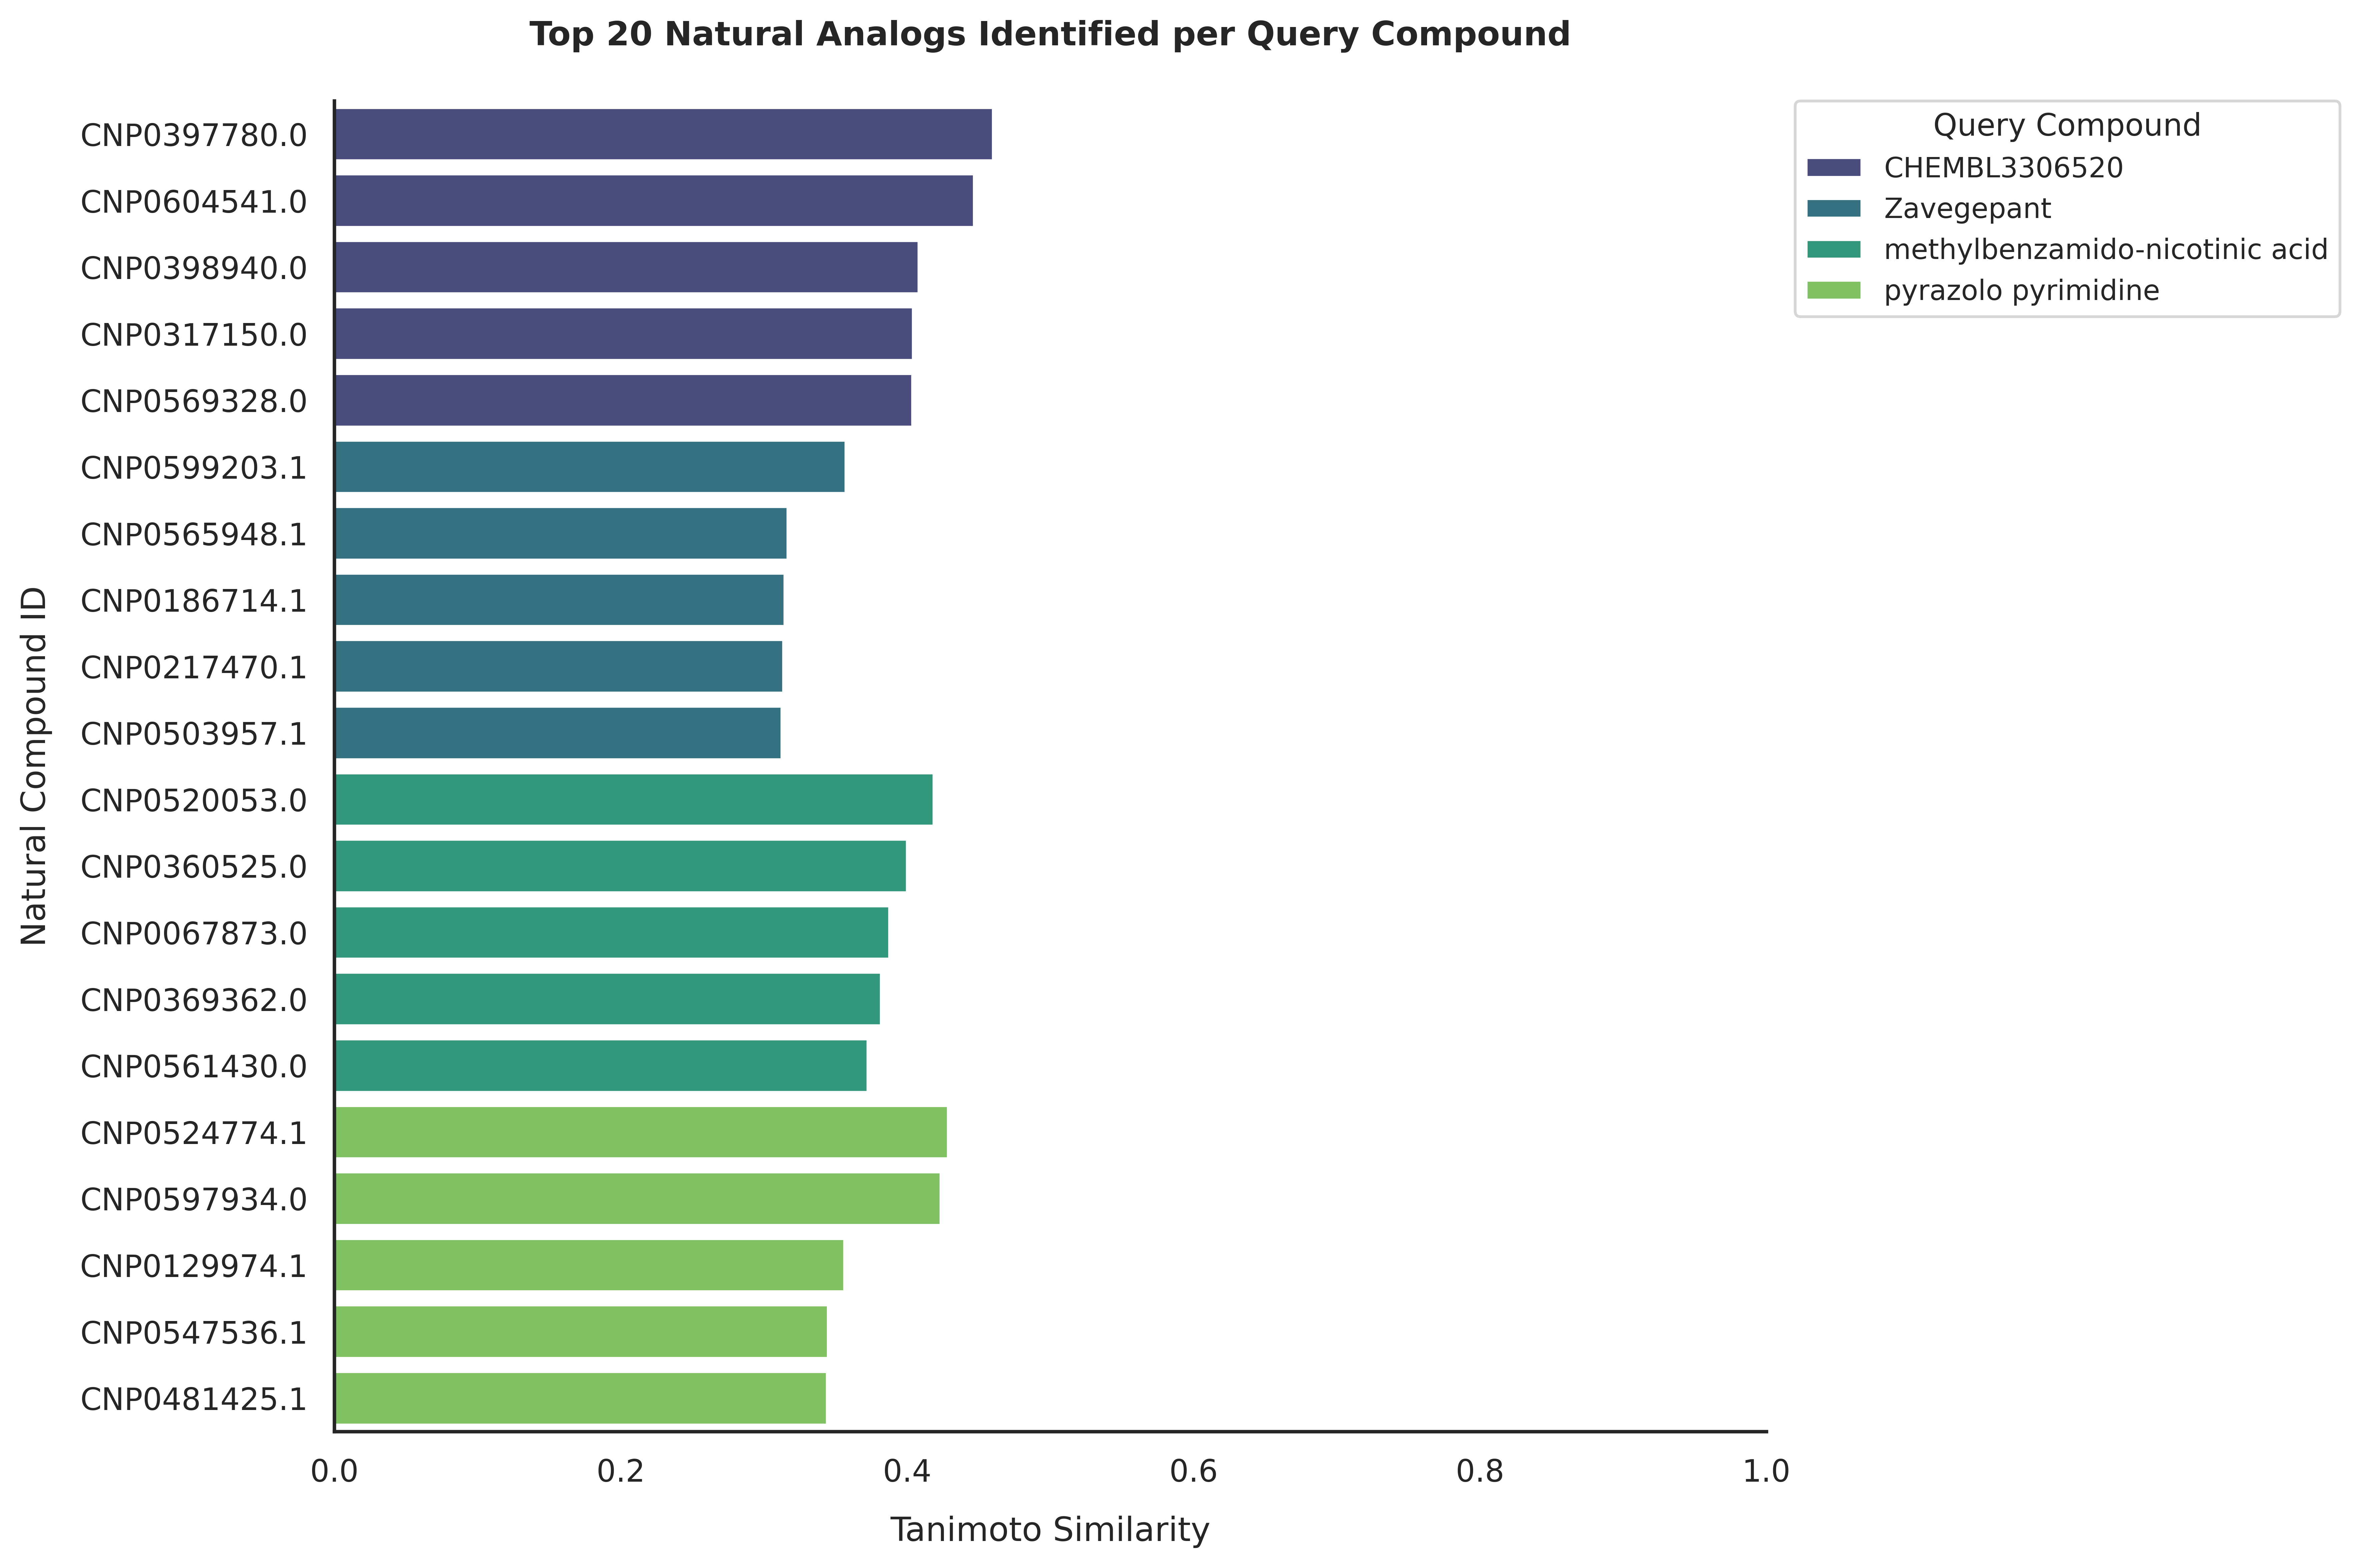

✅ Complete figure saved (X-axis 0–1, 600 dpi, PNG & PDF).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load data ---
df = pd.read_csv("/content/Top_Natural_Analogs.csv")  # Columns: Query, Natural_ID, Similarity

# --- Step 2: Sort for clarity ---
df = df.sort_values(by=["Query", "Similarity"], ascending=[True, False]).reset_index(drop=True)

# --- Step 3: Style settings ---
sns.set_theme(style="white")

# --- Step 4: Create figure ---
fig, ax = plt.subplots(figsize=(12, 8))  # wider figure for full axis

# --- Step 5: Plot bar chart ---
sns.barplot(
    data=df,
    y="Natural_ID",
    x="Similarity",
    hue="Query",
    palette="viridis",
    ax=ax,
    dodge=False
)

# --- Step 6: Labels and title ---
ax.set_xlabel("Tanimoto Similarity", labelpad=10)
ax.set_ylabel("Natural Compound ID", labelpad=10)
ax.set_title(
    "Top 20 Natural Analogs Identified per Query Compound",
    pad=20,
    weight="bold"
)

# --- Step 7: Fix X-axis to full 0–1 scale ---
ax.set_xlim(0, 1.0)

# --- Step 8: Legend outside top-right ---
ax.legend(
    title="Query Compound",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=True,
    fontsize=10,
    title_fontsize=11
)

# --- Step 9: Clean appearance ---
sns.despine()
ax.grid(False)

# --- Step 10: Save high-resolution figure ---
plt.tight_layout()
plt.savefig(
    "Top20_Natural_Analogs_FullScale.png",
    dpi=600,
    bbox_inches="tight",
    facecolor="white"
)
plt.savefig(
    "Top20_Natural_Analogs_FullScale.pdf",
    dpi=600,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()
print("✅ Complete figure saved (X-axis 0–1, 600 dpi, PNG & PDF).")
